**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [505]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
from scipy.stats import zscore
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [506]:
src = pd.read_csv("2Classdata.csv") #reading src file
src #displaying dataframe where file is read

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [507]:
src.shape #checking shape

(310, 7)

In [508]:
src.describe() #getting basic stats about the data like count mean std min etc

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [509]:
src.head() #top 5 records

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [510]:
src.tail() #bottom 5 records

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [511]:
src.count() #count in each column

pelvic_incidence            310
pelvic_tilt numeric         310
lumbar_lordosis_angle       310
sacral_slope                310
pelvic_radius               310
degree_spondylolisthesis    310
class                       310
dtype: int64

In [512]:
src.isnull().values.any() #finding null values if any

False

In [513]:
src.isnull().sum() #finding sum of boolean isnull() function, as it is 0 for all cols, there is no null values

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [514]:
src[src.isnull().any(axis=1)] #printing null values in any columns of dataframe if any

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class


In [515]:
arr=src['class'].unique()

print ('Unique values of class column from the source file:')
for x in range(len(arr)): 
    print (arr[x])

Unique values of class column from the source file:
Abnormal
Normal


In [516]:
src['class'].value_counts() #distribution of class values and other attributes in term of counts

Abnormal    210
Normal      100
Name: class, dtype: int64

In [517]:
src.groupby(["class"]).count() #distribution of class values and other attributes in term of counts

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


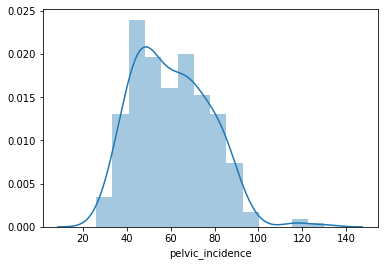

In [518]:
#distribution of pelvic_incidence
x = src['pelvic_incidence']
sns.distplot(x)

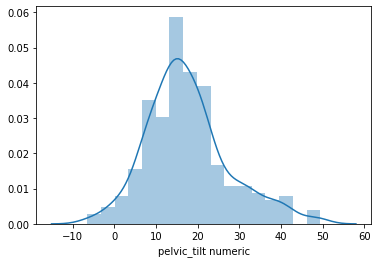

In [519]:
#distribution of pelvic_tilt numeric
x = src['pelvic_tilt numeric']
sns.distplot(x)

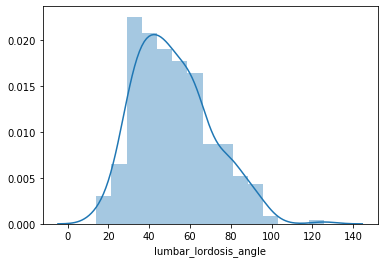

In [520]:
#distribution of lumbar_lordosis_angle
x = src['lumbar_lordosis_angle']
sns.distplot(x)

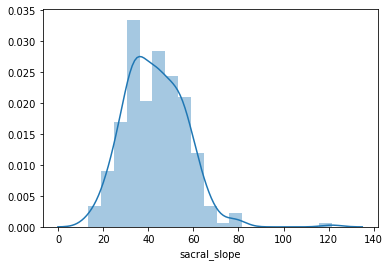

In [521]:
#distribution of sacral_slope
x = src['sacral_slope']
sns.distplot(x)

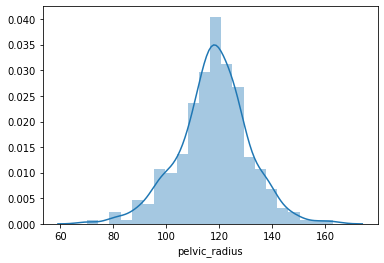

In [522]:
#distribution of pelvic_radius
x = src['pelvic_radius']
sns.distplot(x)

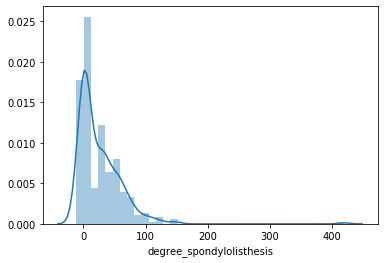

In [523]:
#distribution of degree_spondylolisthesis
x = src['degree_spondylolisthesis']
sns.distplot(x)

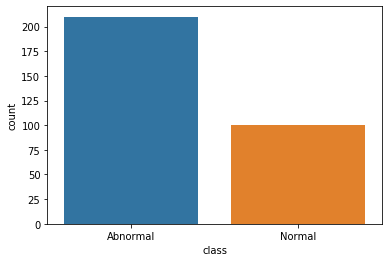

In [524]:
#distribution of class
sns.countplot(x='class',data=src) #plot of count
plt.show()

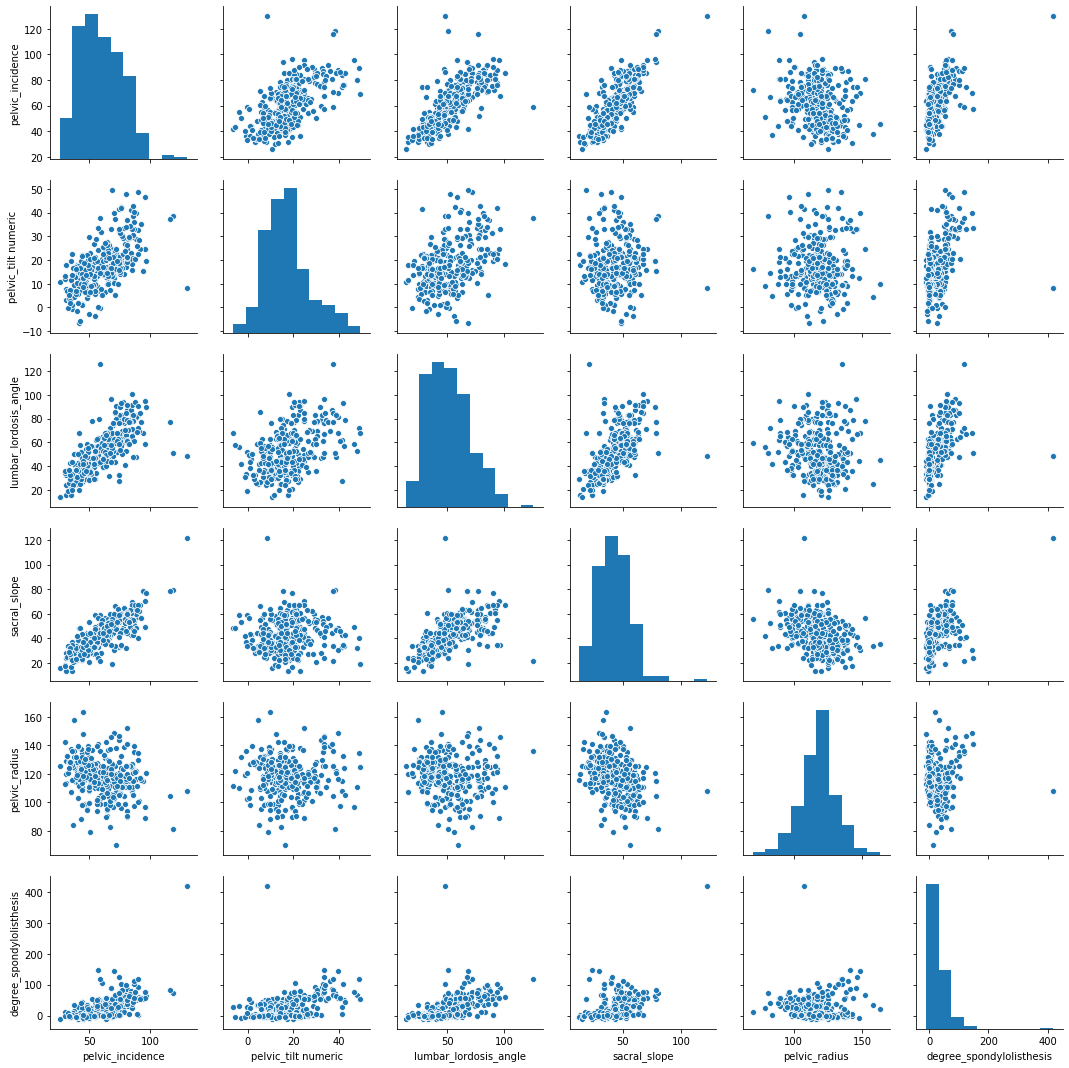

In [525]:
#distribution all columns at once as pair plot
sns.pairplot(src)

In [526]:
src.dtypes #checking data types of the dataset

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

Distribution of different class values for pelvic_radius column:


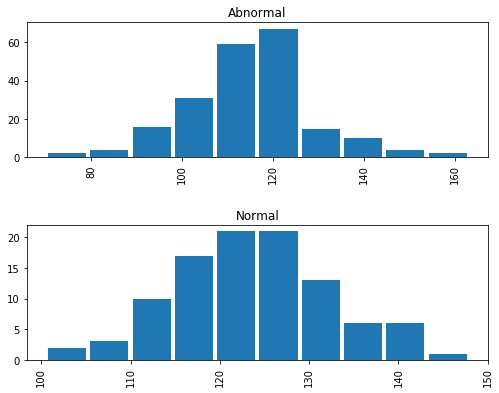

In [527]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

#Answer 1:

print('Distribution of different class values for pelvic_radius column:')
pr=src.hist(column='pelvic_radius', by='class', bins=10, grid=True, figsize=(8,10), layout=(3,1), rwidth=0.9)

Distribution of different class values for sacral_slope column:


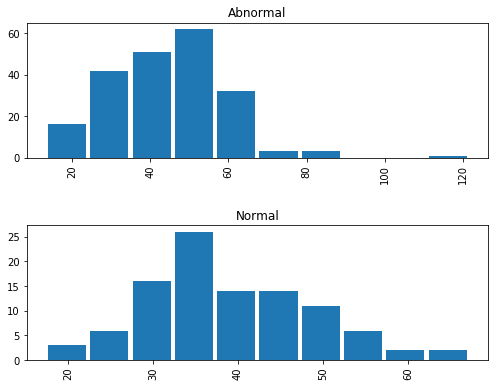

In [528]:
print('Distribution of different class values for sacral_slope column:')

ss=src.hist(column='sacral_slope', by='class', bins=10, grid=True, figsize=(8,10), layout=(3,1), rwidth=0.9)

Distribution of different class values for pelvic_radius and sacral_slope column together:


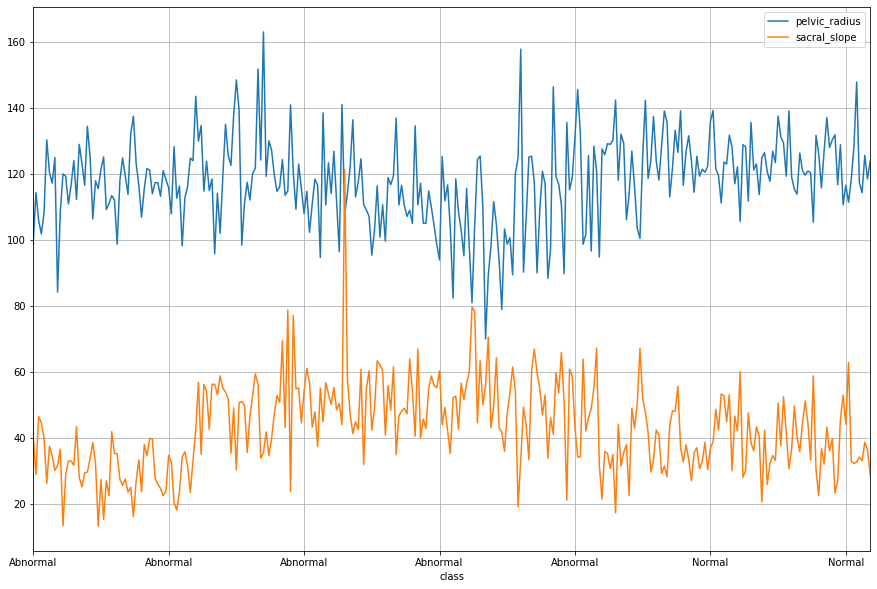

In [529]:
#Answer 2:

print('Distribution of different class values for pelvic_radius and sacral_slope column together:')
src.plot(x='class', y=['pelvic_radius', 'sacral_slope'], figsize=(15,10), grid=True)

Distribution of different class values for pelvic_radius column side by side:


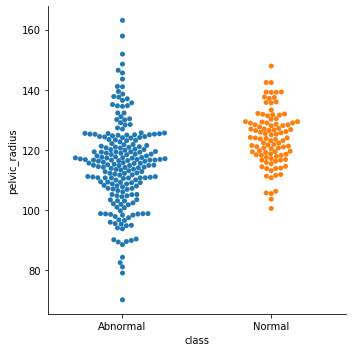

In [530]:
#Answer 3:

print('Distribution of different class values for pelvic_radius column side by side:')
sns.catplot(x="class", y="pelvic_radius", kind="swarm", data=src)

Distribution of different class values for sacral_slope column side by side:


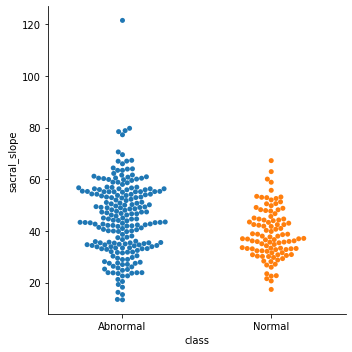

In [531]:
print('Distribution of different class values for sacral_slope column side by side:')
sns.catplot(x="class", y="sacral_slope", kind="swarm", data=src)

Distribution of different class values for pelvic_radius column side by side:


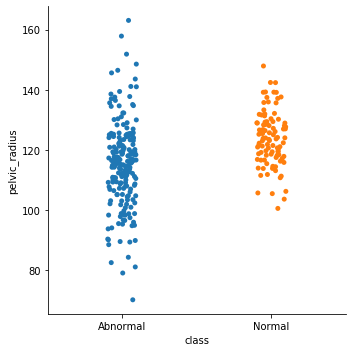

In [532]:
#Answer 4:

print('Distribution of different class values for pelvic_radius column side by side:')
sns.catplot(x="class", y="pelvic_radius", data=src)

Distribution of different class values for sacral_slope column side by side:


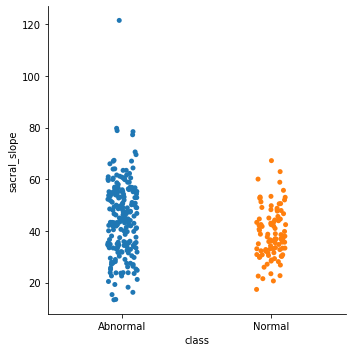

In [533]:
print('Distribution of different class values for sacral_slope column side by side:')
sns.catplot(x="class", y="sacral_slope", data=src)

# Encode the Class variable to integer.

In [534]:
#dtypes before encoding
src.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [535]:
le = preprocessing.LabelEncoder()
le.fit(src['class']) #fitting class Column to LabelEncoder Function
src['class'] = le.transform(src['class']) #replacing

In [536]:
#dtypes after encoding
src.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int64
dtype: object

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [537]:
#Create a separate dataframe consisting only of the features i.e independent attributes

feature_src = src.drop(labels= "class" , axis = 1)

# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
X = np.array(feature_src.apply(zscore))  # convert all attributes to Z scale 

#X(Feature-set)
X

array([[ 0.14708636,  0.50136873, -0.6651769 , -0.18495031, -1.4476468 ,
        -0.70805942],
       [-1.24586434, -0.74876898, -1.45300075, -1.0415207 , -0.26438488,
        -0.57955637],
       [ 0.4843695 ,  0.46793218, -0.09926175,  0.2730833 , -0.89768556,
        -0.79542095],
       ...,
       [ 0.05520137,  0.51561812, -0.31097748, -0.31356364,  0.58289256,
        -0.77348834],
       [-0.88582307, -0.88565951, -0.55861259, -0.47712775,  0.04702109,
        -0.69554822],
       [-1.54892681, -1.24785954, -0.82539423, -1.05855695,  0.45311695,
        -0.70658867]])

In [538]:
# store the target data into a separate np array

target_src_final = src["class"]

Y = np.array(target_src_final)

#Y(Target-set)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Normalize your Data (X) to get values between 0 to 1.

In [539]:
X_Norm = (X - np.min(X))/np.ptp(X)

In [540]:
X_Norm

array([[0.26639391, 0.29159483, 0.20861577, 0.24277539, 0.15295689,
        0.20556544],
       [0.16731014, 0.20266967, 0.15257605, 0.18184557, 0.23712502,
        0.21470615],
       [0.29038564, 0.28921641, 0.24887061, 0.27535636, 0.19207689,
        0.19935121],
       ...,
       [0.25985792, 0.29260842, 0.23381078, 0.23362682, 0.29739381,
        0.20091133],
       [0.1929207 , 0.19293233, 0.21619593, 0.22199213, 0.25927604,
        0.20645539],
       [0.14575261, 0.16716822, 0.19721914, 0.18063374, 0.28816257,
        0.20567005]])

In [541]:
print('Min Val of Normalized Array',X_Norm.min())
print('Max Val of Normalized Array',X_Norm.max())

Min Val of Normalized Array 0.0
Max Val of Normalized Array 1.0


# Split the dat as train and test with a ratio of 70:30.

In [542]:
#Split X_Norm (Normalized Feature Set to be between 0 & 1) and Y (Target Set) into training and test set in 70:30

X_train, X_test, Y_train, Y_test = train_test_split(X_Norm, Y, test_size=0.30)

#We can also use Feature Set (X) and Target Set (Y) to do this split as below:

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [543]:
X_train

array([[0.37720028, 0.29221154, 0.40427961, 0.38460132, 0.16273807,
        0.21181657],
       [0.26795085, 0.23153168, 0.24136195, 0.28955802, 0.22380676,
        0.26634136],
       [0.27767232, 0.22506495, 0.22547669, 0.30686291, 0.31731086,
        0.20228805],
       ...,
       [0.15344845, 0.26946011, 0.13600507, 0.11424658, 0.36089711,
        0.20554819],
       [0.29340915, 0.24068511, 0.34236001, 0.31542402, 0.18716682,
        0.26238949],
       [0.229666  , 0.21601115, 0.2216367 , 0.25196887, 0.2788742 ,
        0.20633929]])

In [544]:
X_test

array([[0.21183292, 0.25019082, 0.16403695, 0.20358499, 0.27473588,
        0.20967745],
       [0.24808954, 0.12918593, 0.25427656, 0.34036373, 0.17098566,
        0.25927564],
       [0.27457887, 0.32754492, 0.25215504, 0.22648107, 0.24876482,
        0.21935692],
       [0.27460288, 0.20108411, 0.27822207, 0.3208017 , 0.1319081 ,
        0.30032026],
       [0.18924063, 0.19472825, 0.23662069, 0.21592754, 0.3163859 ,
        0.21552172],
       [0.25971383, 0.31175369, 0.20664875, 0.21916699, 0.17827114,
        0.2474837 ],
       [0.29430827, 0.2291265 , 0.27923645, 0.32519673, 0.26133483,
        0.2400309 ],
       [0.31527952, 0.23006347, 0.29725849, 0.35142716, 0.24142251,
        0.26897386],
       [0.16582605, 0.22675796, 0.1755569 , 0.16197951, 0.28395755,
        0.2087591 ],
       [0.18879002, 0.13888591, 0.20243679, 0.25698524, 0.15082328,
        0.25140511],
       [0.24010677, 0.22685374, 0.22459238, 0.2572915 , 0.12631035,
        0.2460889 ],
       [0.35280569, 0

In [545]:
Y_train

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [546]:
Y_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0])

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [547]:
NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance' ) #randomly chosen 10 neighbours
NNH.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [548]:
NNH.score(X_train, Y_train) #score of training set

1.0

In [549]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, Y_test) #score of test set

0.7741935483870968

In [550]:
#checking accuracy score
print(metrics.accuracy_score(Y_test, predicted_labels))

0.7741935483870968


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [551]:
NNH.score(X_test, Y_test) #score of test set

0.7741935483870968

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [552]:
#defining function wherein i will find MSE (Miss Classification Error) for different values of k (taking range from 1 to 100)

def my_function(n): 
    NNH = KNeighborsClassifier(n_neighbors= n , weights = 'distance' )
    NNH.fit(X_train, Y_train)
    predicted_labels = NNH.predict(X_test)
    return n,1-metrics.accuracy_score(Y_test, predicted_labels)

i=0 #iteration variable
k_MSE = pd.DataFrame(columns=['k-value','MSE']) #creating DataFrame
    
#printing K Value for 200 diff values of k ranging from 1 to 201, also will take these values in a dataframe k_MSE
for x in range(1, 201, 1):
    a,b=my_function(x)
    print('for K Value',a,'MSE is:',b)
    k_MSE.loc[i]=[a,b]
    i=i+1

for K Value 1 MSE is: 0.23655913978494625
for K Value 2 MSE is: 0.23655913978494625
for K Value 3 MSE is: 0.30107526881720426
for K Value 4 MSE is: 0.26881720430107525
for K Value 5 MSE is: 0.21505376344086025
for K Value 6 MSE is: 0.22580645161290325
for K Value 7 MSE is: 0.23655913978494625
for K Value 8 MSE is: 0.25806451612903225
for K Value 9 MSE is: 0.25806451612903225
for K Value 10 MSE is: 0.22580645161290325
for K Value 11 MSE is: 0.20430107526881724
for K Value 12 MSE is: 0.21505376344086025
for K Value 13 MSE is: 0.20430107526881724
for K Value 14 MSE is: 0.23655913978494625
for K Value 15 MSE is: 0.22580645161290325
for K Value 16 MSE is: 0.24731182795698925
for K Value 17 MSE is: 0.23655913978494625
for K Value 18 MSE is: 0.23655913978494625
for K Value 19 MSE is: 0.18279569892473113
for K Value 20 MSE is: 0.19354838709677424
for K Value 21 MSE is: 0.18279569892473113
for K Value 22 MSE is: 0.18279569892473113
for K Value 23 MSE is: 0.17204301075268813
for K Value 24 MSE i

In [553]:
#printing Dataframe k_MSE after converting k-value to int from float
k_MSE['k-value'] = k_MSE['k-value'].astype('Int64')
k_MSE

,k-value,MSE
0,1,0.236559
1,2,0.236559
2,3,0.301075
3,4,0.268817
4,5,0.215054
5,6,0.225806
6,7,0.236559
7,8,0.258065
8,9,0.258065
9,10,0.225806


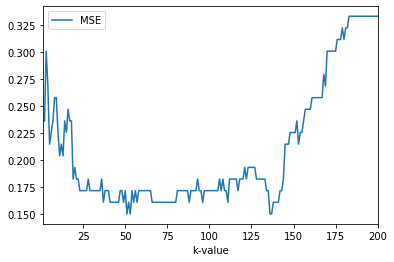

In [554]:
#printing a plot with k-value vs MSE
k_MSE.plot(x='k-value',y='MSE')
plt.show()

In [555]:
#checking k-value for lowest MSE

k_MSE.loc[k_MSE['MSE'] == k_MSE.MSE.min()]

#printing k-value(s) with minimum MSE. These k-value(s) can be called as the most optimal k-value

,k-value,MSE
50,51,0.150538
52,53,0.150538
135,136,0.150538
136,137,0.150538


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [556]:
src_new = pd.read_csv("3Classdata.csv") #reading src file
src_new #displaying dataframe where file is read

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [557]:
src_new.shape #checking shape

(310, 7)

In [558]:
src_new.describe() #getting basic stats about the data like count mean std min etc

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [559]:
src_new.head() #top 5 records

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [560]:
src_new.tail() #bottom 5 records

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [561]:
src_new.count() #count in each column

pelvic_incidence            310
pelvic_tilt                 310
lumbar_lordosis_angle       310
sacral_slope                310
pelvic_radius               310
degree_spondylolisthesis    310
class                       310
dtype: int64

In [562]:
src_new.isnull().values.any() #finding null values if any

False

In [563]:
src_new.isnull().sum() #finding sum of boolean isnull() function, as it is 0 for all cols, there is no null values

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [564]:
src_new[src_new.isnull().any(axis=1)] #printing null values in any columns of dataframe if any

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class


In [565]:
arr_new=src_new['class'].unique()

print ('Unique values of class column from the source file:')
for x in range(len(arr_new)): 
    print (arr_new[x])

Unique values of class column from the source file:
Hernia
Spondylolisthesis
Normal


In [566]:
src_new['class'].value_counts() #distribution of class values and other attributes in term of counts

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [567]:
src_new.groupby(["class"]).count() #distribution of class values and other attributes in term of counts

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


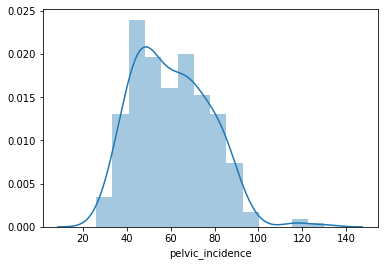

In [568]:
#distribution of pelvic_incidence
x = src_new['pelvic_incidence']
sns.distplot(x)

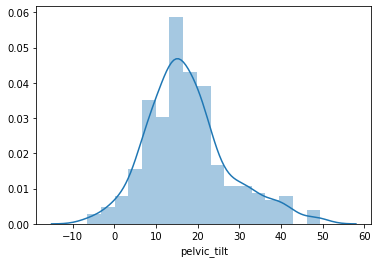

In [569]:
#distribution of pelvic_tilt
x = src_new['pelvic_tilt']
sns.distplot(x)

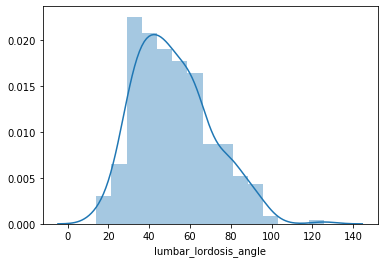

In [570]:
#distribution of lumbar_lordosis_angle
x = src_new['lumbar_lordosis_angle']
sns.distplot(x)

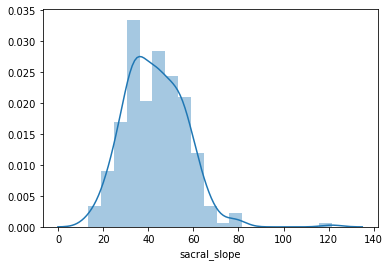

In [571]:
#distribution of sacral_slope
x = src_new['sacral_slope']
sns.distplot(x)

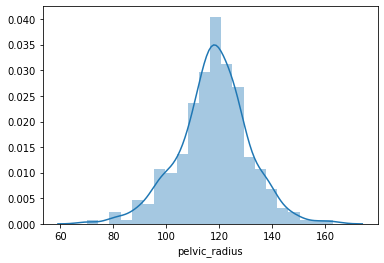

In [572]:
#distribution of pelvic_radius
x = src_new['pelvic_radius']
sns.distplot(x)

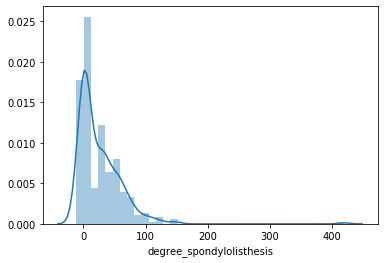

In [573]:
#distribution of degree_spondylolisthesis
x = src_new['degree_spondylolisthesis']
sns.distplot(x)

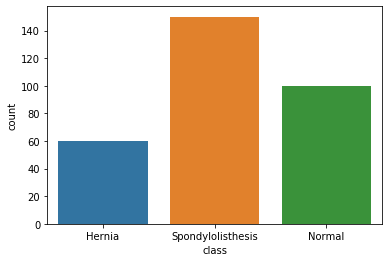

In [574]:
#distribution of class
sns.countplot(x='class',data=src_new) #plot of count
plt.show()

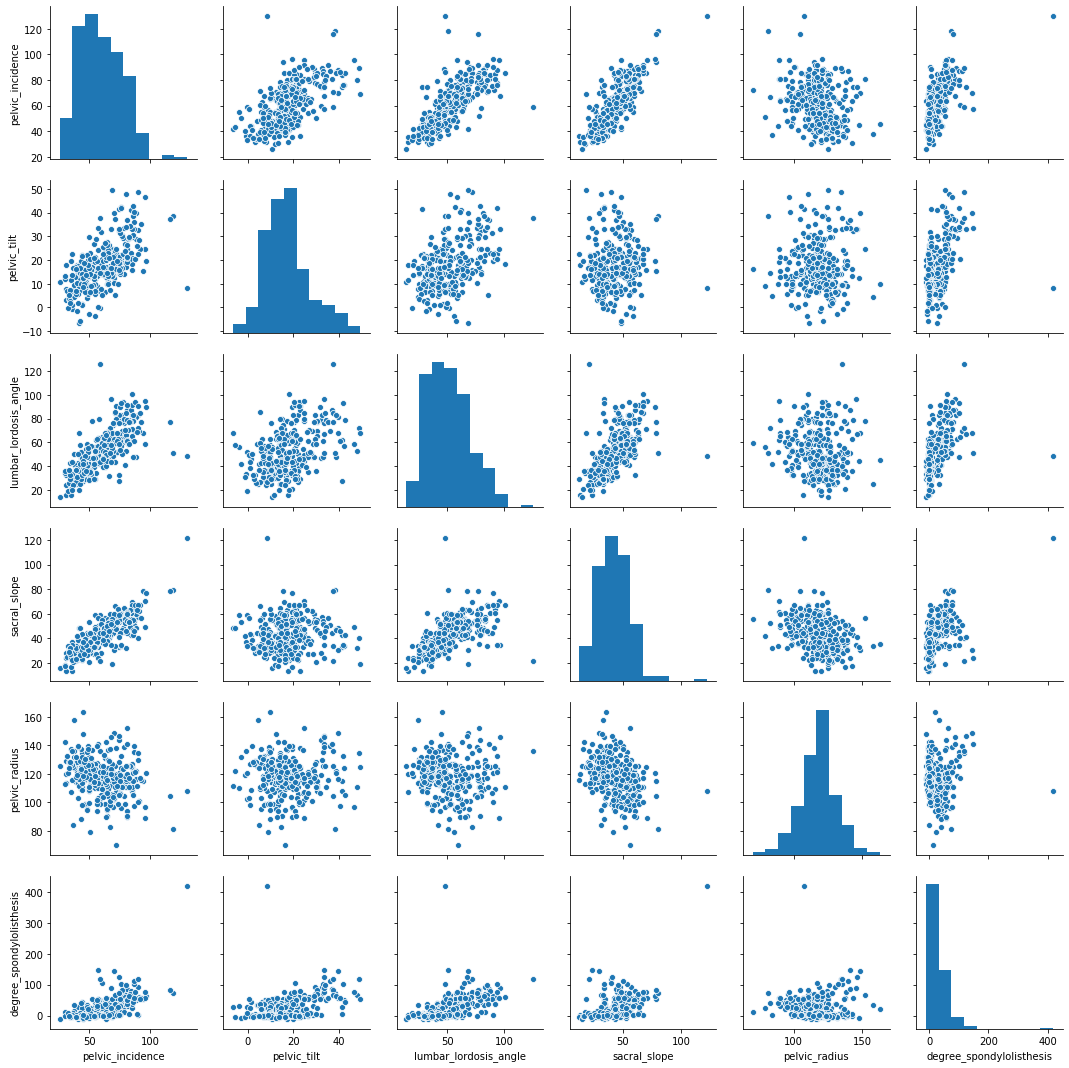

In [575]:
#distribution all columns at once as pair plot
sns.pairplot(src_new)

In [576]:
src_new.dtypes #checking data types of the dataset

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

Distribution of different class values for pelvic_radius column:


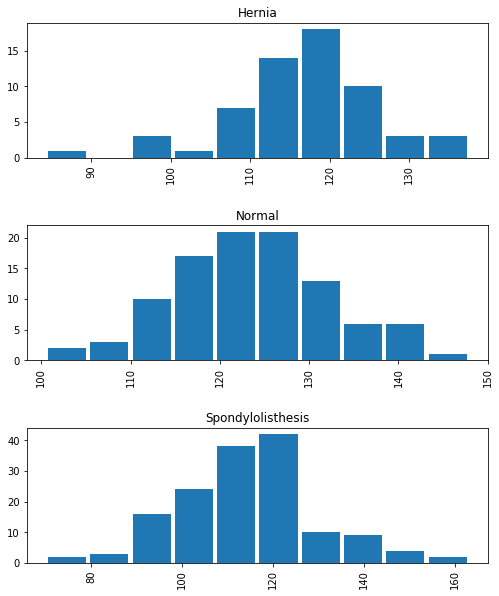

In [577]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

#Answer 1:

print('Distribution of different class values for pelvic_radius column:')
pr=src_new.hist(column='pelvic_radius', by='class', bins=10, grid=True, figsize=(8,10), layout=(3,1), rwidth=0.9)

Distribution of different class values for sacral_slope column:


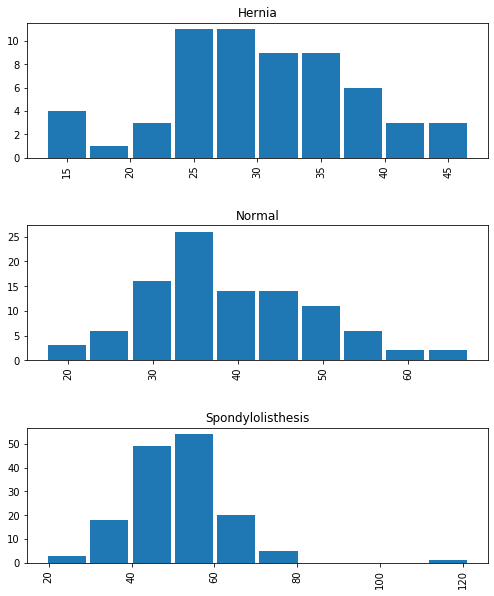

In [578]:
print('Distribution of different class values for sacral_slope column:')
ss=src_new.hist(column='sacral_slope', by='class', bins=10, grid=True, figsize=(8,10), layout=(3,1), rwidth=0.9)

Distribution of different class values for pelvic_radius and sacral_slope column together:


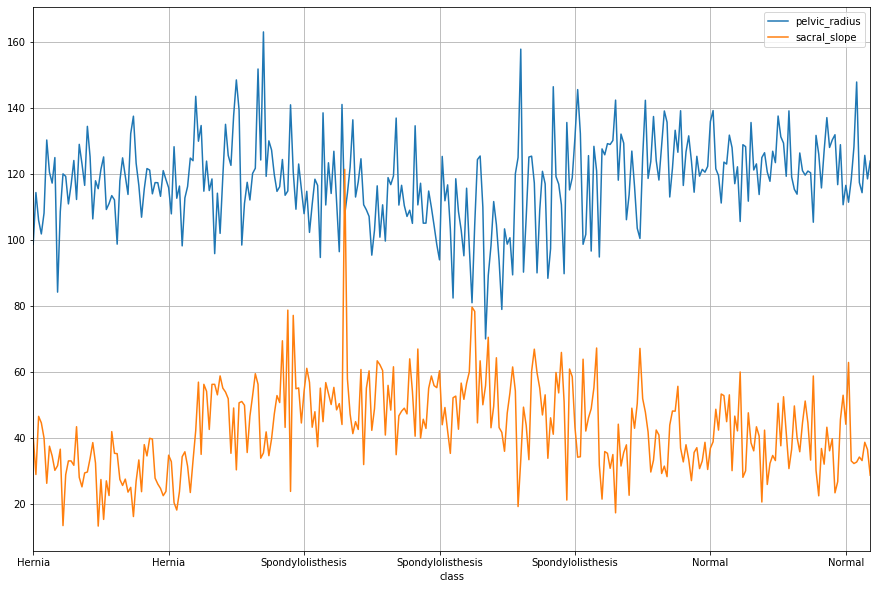

In [579]:
#Answer 2:

print('Distribution of different class values for pelvic_radius and sacral_slope column together:')
src_new.plot(x='class', y=['pelvic_radius', 'sacral_slope'], figsize=(15,10), grid=True)

Distribution of different class values for pelvic_radius column values side by side:


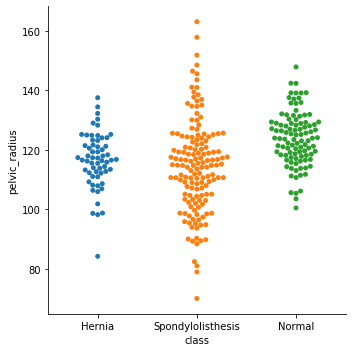

In [580]:
#Answer 3:

print('Distribution of different class values for pelvic_radius column values side by side:')
sns.catplot(x="class", y="pelvic_radius", kind="swarm", data=src_new)

Distribution of different class values for sacral_slope column values side by side:


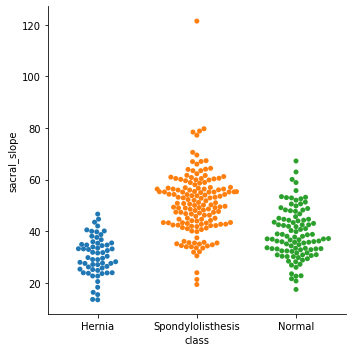

In [581]:
print('Distribution of different class values for sacral_slope column values side by side:')
sns.catplot(x="class", y="sacral_slope", kind="swarm", data=src_new)

Distribution of different class values for pelvic_radius column values side by side:


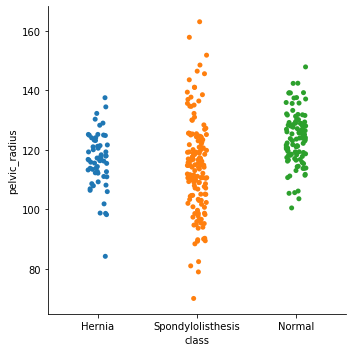

In [582]:
#Answer 4:

print('Distribution of different class values for pelvic_radius column values side by side:')
sns.catplot(x="class", y="pelvic_radius", data=src_new)

Distribution of different class values for sacral_slope column values side by side:


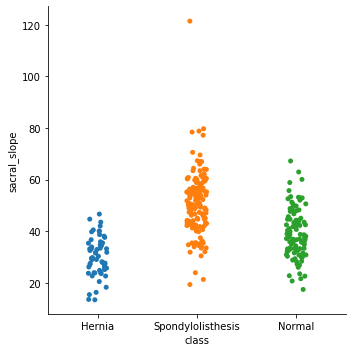

In [583]:
print('Distribution of different class values for sacral_slope column values side by side:')
sns.catplot(x="class", y="sacral_slope", data=src_new)

In [584]:
#dtypes before encoding
src_new.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [585]:
le = preprocessing.LabelEncoder()
le.fit(src_new['class']) #fitting class Column to LabelEncoder Function
src_new['class'] = le.transform(src_new['class']) #replacing

In [586]:
#dtypes after encoding
src_new.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int64
dtype: object

In [587]:
#Create a separate dataframe consisting only of the features i.e independent attributes

feature_src = src_new.drop(labels= "class" , axis = 1)

# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
X = np.array(feature_src.apply(zscore))  # convert all attributes to Z scale 

#X(Feature-set)
X

array([[ 0.14708636,  0.50136873, -0.6651769 , -0.18495031, -1.4476468 ,
        -0.70805942],
       [-1.24586434, -0.74876898, -1.45300075, -1.0415207 , -0.26438488,
        -0.57955637],
       [ 0.4843695 ,  0.46793218, -0.09926175,  0.2730833 , -0.89768556,
        -0.79542095],
       ...,
       [ 0.05520137,  0.51561812, -0.31097748, -0.31356364,  0.58289256,
        -0.77348834],
       [-0.88582307, -0.88565951, -0.55861259, -0.47712775,  0.04702109,
        -0.69554822],
       [-1.54892681, -1.24785954, -0.82539423, -1.05855695,  0.45311695,
        -0.70658867]])

In [588]:
# store the target data into a separate np array

target_src_final = src_new["class"]

Y = np.array(target_src_final)

#Y(Target-set)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [589]:
#Normalize your Data (X) to get values between 0 to 1
X_Norm = (X - np.min(X))/np.ptp(X)
print('Min Val of Normalized Array',X_Norm.min())
print('Max Val of Normalized Array',X_Norm.max())

Min Val of Normalized Array 0.0
Max Val of Normalized Array 1.0


In [590]:
X_Norm

array([[0.26639391, 0.29159483, 0.20861577, 0.24277539, 0.15295689,
        0.20556544],
       [0.16731014, 0.20266967, 0.15257605, 0.18184557, 0.23712502,
        0.21470615],
       [0.29038564, 0.28921641, 0.24887061, 0.27535636, 0.19207689,
        0.19935121],
       ...,
       [0.25985792, 0.29260842, 0.23381078, 0.23362682, 0.29739381,
        0.20091133],
       [0.1929207 , 0.19293233, 0.21619593, 0.22199213, 0.25927604,
        0.20645539],
       [0.14575261, 0.16716822, 0.19721914, 0.18063374, 0.28816257,
        0.20567005]])

In [591]:
#Split X_Norm (Normalized Feature Set to be between 0 & 1) and Y (Target Set) into training and test set in 70:30

X_train, X_test, Y_train, Y_test = train_test_split(X_Norm, Y, test_size=0.30)

#We can also use Feature Set (X) and Target Set (Y) to do this split as below:

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [592]:
X_train

array([[0.28451819, 0.25521927, 0.28747184, 0.29317045, 0.2195694 ,
        0.26894615],
       [0.17605139, 0.25435368, 0.18503937, 0.1545343 , 0.24767761,
        0.18789571],
       [0.24208076, 0.24843003, 0.22103055, 0.2437389 , 0.23391908,
        0.21556153],
       ...,
       [0.16254404, 0.1629333 , 0.15140446, 0.20535308, 0.46954489,
        0.2697986 ],
       [0.29801145, 0.28555678, 0.28377209, 0.28787726, 0.17615127,
        0.25880226],
       [0.18440205, 0.20206936, 0.16763943, 0.20424078, 0.28560613,
        0.20935063]])

In [593]:
X_test

array([[0.23669659, 0.33640669, 0.23964831, 0.17122931, 0.28477392,
        0.21138303],
       [0.32584003, 0.34031561, 0.29932841, 0.28278331, 0.2587672 ,
        0.38353301],
       [0.35280569, 0.42495643, 0.29459639, 0.25430115, 0.24037195,
        0.2564841 ],
       [0.29430827, 0.2291265 , 0.27923645, 0.32519673, 0.26133483,
        0.2400309 ],
       [0.17291689, 0.12158367, 0.17549073, 0.24950328, 0.2635015 ,
        0.19433691],
       [0.2715484 , 0.22009401, 0.3203334 , 0.30270559, 0.13465759,
        0.28080618],
       [0.34339379, 0.33570493, 0.28013048, 0.30876173, 0.23907471,
        0.2641118 ],
       [0.28077588, 0.27981383, 0.17835038, 0.27002715, 0.31468581,
        0.20892606],
       [0.25971383, 0.31175369, 0.20664875, 0.21916699, 0.17827114,
        0.2474837 ],
       [0.27024512, 0.24538214, 0.29891152, 0.2821771 , 0.38668126,
        0.2179968 ],
       [0.29935502, 0.39811475, 0.38113845, 0.20567876, 0.2946841 ,
        0.33460604],
       [0.19339176, 0

In [594]:
Y_train

array([2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2,
       0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 1,
       2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2,
       0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2,
       1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0,
       1, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0,
       0, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1])

In [595]:
Y_test

array([0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0,
       0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 2])

In [596]:
NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance' ) #randomly chosen 10 neighbours
NNH.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [597]:
NNH.score(X_train, Y_train) #score of training set

1.0

In [598]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, Y_test) #score of test set

0.8172043010752689

In [599]:
#checking accuracy score
print(metrics.accuracy_score(Y_test, predicted_labels))

0.8172043010752689


In [600]:
NNH.score(X_test, Y_test) #score of test set

0.8172043010752689

In [601]:
#defining function wherein i will find MSE (Miss Classification Error) for different values of k (taking range from 1 to 100)

def my_function(n): 
    NNH = KNeighborsClassifier(n_neighbors= n , weights = 'distance' )
    NNH.fit(X_train, Y_train)
    predicted_labels = NNH.predict(X_test)
    return n,1-metrics.accuracy_score(Y_test, predicted_labels)

i=0 #iteration variable
k_MSE_scr_new = pd.DataFrame(columns=['k-value','MSE']) #creating DataFrame
    
#printing K Value for 200 diff values of k ranging from 1 to 201, also will take these values in a dataframe k_MSE
for x in range(1, 201, 1):
    a,b=my_function(x)
    print('for K Value',a,'MSE is:',b)
    k_MSE_scr_new.loc[i]=[a,b]
    i=i+1

for K Value 1 MSE is: 0.18279569892473113
for K Value 2 MSE is: 0.18279569892473113
for K Value 3 MSE is: 0.22580645161290325
for K Value 4 MSE is: 0.22580645161290325
for K Value 5 MSE is: 0.19354838709677424
for K Value 6 MSE is: 0.18279569892473113
for K Value 7 MSE is: 0.17204301075268813
for K Value 8 MSE is: 0.18279569892473113
for K Value 9 MSE is: 0.17204301075268813
for K Value 10 MSE is: 0.18279569892473113
for K Value 11 MSE is: 0.15053763440860213
for K Value 12 MSE is: 0.17204301075268813
for K Value 13 MSE is: 0.16129032258064513
for K Value 14 MSE is: 0.15053763440860213
for K Value 15 MSE is: 0.12903225806451613
for K Value 16 MSE is: 0.15053763440860213
for K Value 17 MSE is: 0.12903225806451613
for K Value 18 MSE is: 0.12903225806451613
for K Value 19 MSE is: 0.13978494623655913
for K Value 20 MSE is: 0.13978494623655913
for K Value 21 MSE is: 0.15053763440860213
for K Value 22 MSE is: 0.15053763440860213
for K Value 23 MSE is: 0.12903225806451613
for K Value 24 MSE i

for K Value 192 MSE is: 0.20430107526881724
for K Value 193 MSE is: 0.20430107526881724
for K Value 194 MSE is: 0.21505376344086025
for K Value 195 MSE is: 0.21505376344086025
for K Value 196 MSE is: 0.21505376344086025
for K Value 197 MSE is: 0.21505376344086025
for K Value 198 MSE is: 0.21505376344086025
for K Value 199 MSE is: 0.21505376344086025
for K Value 200 MSE is: 0.21505376344086025


In [602]:
#printing Dataframe k_MSE after converting k-value to int from float
k_MSE_scr_new['k-value'] = k_MSE_scr_new['k-value'].astype('Int64')
k_MSE_scr_new

,k-value,MSE
0,1,0.182796
1,2,0.182796
2,3,0.225806
3,4,0.225806
4,5,0.193548
5,6,0.182796
6,7,0.172043
7,8,0.182796
8,9,0.172043
9,10,0.182796


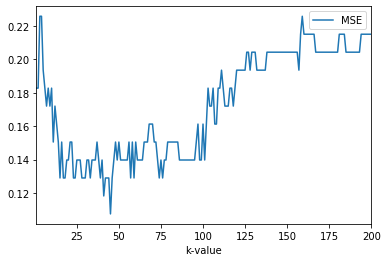

In [603]:
#printing a plot with k-value vs MSE
k_MSE_scr_new.plot(x='k-value',y='MSE')
plt.show()

In [604]:
#checking k-value for lowest MSE

k_MSE_scr_new.loc[k_MSE_scr_new['MSE'] == k_MSE_scr_new.MSE.min()]

#printing k-value(s) with minimum MSE. These k-value(s) can be called as the most optimal k-value

,k-value,MSE
44,45,0.107527
